In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import time
import datetime

#from google.colab import drive
#drive.mount('/content/drive')

### Apple Watch data

In [2]:
import xml.etree.ElementTree as ET
import xmltodict as xd
import pandas as pd
import numpy as np

In [3]:
input_data = pd.read_csv('askar/ah_data.csv')
ah_data = input_data.copy(deep=True)

In [4]:
ah_data.head()

,date,heartrate,calories,METs
0,2021-08-13 17:04:53+03:00,88.2759,0.006941,0.000010
1,2021-08-13 20:39:14+03:00,70.6977,0.006941,0.000010
2,2021-08-14 05:16:15+03:00,51.5436,0.013974,0.000019
3,2021-08-14 07:16:27+03:00,66.4935,0.013974,0.000019
4,2021-08-14 12:39:46+03:00,97.2152,0.013974,0.000019


Метаболический эквивалент METs$ = \frac{calories}{weight}\cdot time$

In [5]:
len(set(ah_data['METs']))

141

In [6]:
len(ah_data['METs'])

1220

In [7]:
ah_data['date'] = pd.to_datetime(ah_data['date'])

ah_data['hour_sin'] = np.sin(2 * np.pi * ah_data["date"].dt.hour/24.0)
ah_data['hour_cos'] = np.cos(2 * np.pi * ah_data["date"].dt.hour/24.0)
ah_data['day_of_week_sin'] = np.sin(2 * np.pi * ah_data["date"].dt.dayofweek/7.0)
ah_data['day_of_week_cos'] = np.cos(2 * np.pi * ah_data["date"].dt.dayofweek/7.0)

ah_data = ah_data[["heartrate", "calories", "METs", "day_of_week_sin", "day_of_week_cos", "hour_sin", "hour_cos"]]
ah_data = pd.concat(
  (
    ah_data,
    ah_data.shift(1).rename(columns=lambda x: x+'_lag1'),
    ah_data.shift(2).rename(columns=lambda x: x+'_lag2'),
    ah_data.shift(3).rename(columns=lambda x: x+'_lag3'),
  ), axis=1)

ah_data.dropna(inplace=True)
ah_data

,heartrate,calories,METs,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,heartrate_lag1,calories_lag1,METs_lag1,...,day_of_week_cos_lag2,hour_sin_lag2,hour_cos_lag2,heartrate_lag3,calories_lag3,METs_lag3,day_of_week_sin_lag3,day_of_week_cos_lag3,hour_sin_lag3,hour_cos_lag3
3,66.4935,0.013974,0.000019,-0.974928,-0.222521,9.659258e-01,-2.588190e-01,51.5436,0.013974,0.000019,...,-0.900969,-8.660254e-01,5.000000e-01,88.2759,0.006941,0.000010,-0.433884,-0.900969,-9.659258e-01,-2.588190e-01
4,97.2152,0.013974,0.000019,-0.974928,-0.222521,1.224647e-16,-1.000000e+00,66.4935,0.013974,0.000019,...,-0.222521,9.659258e-01,2.588190e-01,70.6977,0.006941,0.000010,-0.433884,-0.900969,-8.660254e-01,5.000000e-01
5,109.7140,0.013974,0.000019,-0.974928,-0.222521,-1.000000e+00,-1.836970e-16,97.2152,0.013974,0.000019,...,-0.222521,9.659258e-01,-2.588190e-01,51.5436,0.013974,0.000019,-0.974928,-0.222521,9.659258e-01,2.588190e-01
6,120.9450,0.013974,0.000019,-0.974928,-0.222521,-8.660254e-01,5.000000e-01,109.7140,0.013974,0.000019,...,-0.222521,1.224647e-16,-1.000000e+00,66.4935,0.013974,0.000019,-0.974928,-0.222521,9.659258e-01,-2.588190e-01
7,90.6203,0.013974,0.000019,-0.974928,-0.222521,-2.588190e-01,9.659258e-01,120.9450,0.013974,0.000019,...,-0.222521,-1.000000e+00,-1.836970e-16,97.2152,0.013974,0.000019,-0.974928,-0.222521,1.224647e-16,-1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,69.5023,0.018089,0.000025,0.433884,-0.900969,-8.660254e-01,5.000000e-01,85.8101,0.018089,0.000025,...,-0.900969,-7.071068e-01,-7.071068e-01,57.1004,0.018089,0.000025,0.433884,-0.900969,2.588190e-01,-9.659258e-01
1216,69.3457,0.018089,0.000025,0.433884,-0.900969,-5.000000e-01,8.660254e-01,69.5023,0.018089,0.000025,...,-0.900969,-1.000000e+00,-1.836970e-16,95.5364,0.018089,0.000025,0.433884,-0.900969,-7.071068e-01,-7.071068e-01
1217,66.9284,0.018089,0.000025,0.433884,-0.900969,-2.588190e-01,9.659258e-01,69.3457,0.018089,0.000025,...,-0.900969,-8.660254e-01,5.000000e-01,85.8101,0.018089,0.000025,0.433884,-0.900969,-1.000000e+00,-1.836970e-16
1218,99.0968,0.014533,0.000020,-0.433884,-0.900969,8.660254e-01,-5.000000e-01,66.9284,0.018089,0.000025,...,-0.900969,-5.000000e-01,8.660254e-01,69.5023,0.018089,0.000025,0.433884,-0.900969,-8.660254e-01,5.000000e-01


In [8]:
# lst = list(range(3,len(ah_data)+3))
# Id = pd.DataFrame(lst, index=lst)
# Id

In [9]:
# ah_data.insert(0, "Id", Id)
# ah_data

### Prepaing dataset

In [10]:
import tensorflow as tf

In [11]:
from keras import backend as K

In [12]:
def date2timesamp(date):
    return time.mktime(datetime.datetime.strptime(date, "%Y-%m-%d").timetuple()) #%Y-%m-%d %H:%M:%S

def resample(df, column='Value'):
    df['Time'] =  pd.to_datetime(df['Time'])
    df.set_index(['Time'], inplace=True)
    df[column] = df[column].resample('1T').mean()
    df.dropna(inplace=True)
    return df

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [13]:
dataset = pd.read_csv('askar/new_clusters_12.csv')
dataset["date"] = pd.to_datetime(dataset["date"])

dataset['hour_sin'] = np.sin(2 * np.pi * dataset["date"].dt.hour/24.0)
dataset['hour_cos'] = np.cos(2 * np.pi * dataset["date"].dt.hour/24.0)
dataset['day_of_week_sin'] = np.sin(2 * np.pi * dataset["date"].dt.dayofweek/7.0)
dataset['day_of_week_cos'] = np.cos(2 * np.pi * dataset["date"].dt.dayofweek/7.0)

In [14]:
dataset[:2]

,Unnamed: 0,heartrate,date,calories,METs,cluster,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos
0,0,70,2016-04-17 05:30:20,0.834023,1,3.0,0.965926,0.258819,-0.781831,0.62349
1,1,67,2016-04-17 05:30:25,0.834347,1,3.0,0.965926,0.258819,-0.781831,0.62349


In [15]:
dataset.rename(columns = {'Unnamed: 0' : 'Id'}, inplace = True) 
dataset[:2]

,Id,heartrate,date,calories,METs,cluster,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos
0,0,70,2016-04-17 05:30:20,0.834023,1,3.0,0.965926,0.258819,-0.781831,0.62349
1,1,67,2016-04-17 05:30:25,0.834347,1,3.0,0.965926,0.258819,-0.781831,0.62349


In [16]:
# dataset.to_csv('/content/new_clusters_12.csv', index=False)
# dataset = dataset.sort_values(['Id', 'date'], ascending = [True, True]).set_index('Id')

In [17]:
# !zip new_clusters_12.zip new_clusters_12.csv
# !cp /content/new_data.zip /content/drive/MyDrive/Tensorflow-course/

In [18]:
dataset['Id']

0                0
1                1
2                2
3                3
4                4
            ...   
5457294    5457294
5457295    5457295
5457296    5457296
5457297    5457297
5457298    5457298
Name: Id, Length: 5457299, dtype: int64

<AxesSubplot:>

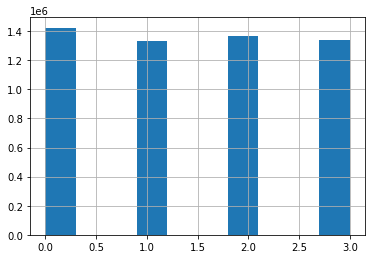

In [19]:
dataset['cluster'].hist()

In [20]:
X = dataset[["Id", "heartrate", "calories", "METs", "day_of_week_sin", "day_of_week_cos", "hour_sin", "hour_cos"]]
y = dataset["cluster"]

In [21]:
X.head()

,Id,heartrate,calories,METs,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos
0,0,70,0.834023,1,-0.781831,0.62349,0.965926,0.258819
1,1,67,0.834347,1,-0.781831,0.62349,0.965926,0.258819
2,2,66,0.830690,1,-0.781831,0.62349,0.965926,0.258819
3,3,66,0.823946,1,-0.781831,0.62349,0.965926,0.258819
4,4,67,0.815004,1,-0.781831,0.62349,0.965926,0.258819


In [22]:
# X = pd.concat(
#   (
#     X,
#     X.groupby(level="Id").shift(1).rename(columns=lambda x: x+'_lag1'),
#     X.groupby(level="Id").shift(2).rename(columns=lambda x: x+'_lag2'),
#     X.groupby(level="Id").shift(3).rename(columns=lambda x: x+'_lag3'),
#   ), axis=1)

# Все превращает в NaN

In [23]:
X = pd.concat((
    X,
    X.shift(periods=1).rename(columns=lambda x: x+'_lag1'),
    X.shift(periods=2).rename(columns=lambda x: x+'_lag2'),
    X.shift(periods=3).rename(columns=lambda x: x+'_lag3') 
), axis=1)

In [24]:
X.head()

,Id,heartrate,calories,METs,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,Id_lag1,heartrate_lag1,...,hour_sin_lag2,hour_cos_lag2,Id_lag3,heartrate_lag3,calories_lag3,METs_lag3,day_of_week_sin_lag3,day_of_week_cos_lag3,hour_sin_lag3,hour_cos_lag3
0,0,70,0.834023,1,-0.781831,0.62349,0.965926,0.258819,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,67,0.834347,1,-0.781831,0.62349,0.965926,0.258819,0.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,66,0.830690,1,-0.781831,0.62349,0.965926,0.258819,1.0,67.0,...,0.965926,0.258819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,66,0.823946,1,-0.781831,0.62349,0.965926,0.258819,2.0,66.0,...,0.965926,0.258819,0.0,70.0,0.834023,1.0,-0.781831,0.62349,0.965926,0.258819
4,4,67,0.815004,1,-0.781831,0.62349,0.965926,0.258819,3.0,66.0,...,0.965926,0.258819,1.0,67.0,0.834347,1.0,-0.781831,0.62349,0.965926,0.258819


In [25]:
X.drop(columns=['Id'], inplace=True)
X.drop(columns=['Id_lag1'], inplace=True)
X.drop(columns=['Id_lag2'], inplace=True)
X.drop(columns=['Id_lag3'], inplace=True)

In [26]:
# X = pd.concat(
#   (
#     X,
#     X.groupby(level="Id").shift(1).rename(columns=lambda x: x+'_lag1'),
#     X.groupby(level="Id").shift(2).rename(columns=lambda x: x+'_lag2'),
#     X.groupby(level="Id").shift(3).rename(columns=lambda x: x+'_lag3'),
#   )
X['cluster'] = y
X.dropna(inplace=True)
y = X['cluster']
X.drop(columns=['cluster'], inplace=True)

In [27]:
X.head()

,heartrate,calories,METs,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,heartrate_lag1,calories_lag1,METs_lag1,...,day_of_week_cos_lag2,hour_sin_lag2,hour_cos_lag2,heartrate_lag3,calories_lag3,METs_lag3,day_of_week_sin_lag3,day_of_week_cos_lag3,hour_sin_lag3,hour_cos_lag3
3,66,0.823946,1,-0.781831,0.62349,0.965926,0.258819,66.0,0.830690,1.0,...,0.62349,0.965926,0.258819,70.0,0.834023,1.0,-0.781831,0.62349,0.965926,0.258819
4,67,0.815004,1,-0.781831,0.62349,0.965926,0.258819,66.0,0.823946,1.0,...,0.62349,0.965926,0.258819,67.0,0.834347,1.0,-0.781831,0.62349,0.965926,0.258819
5,67,0.804757,1,-0.781831,0.62349,0.965926,0.258819,67.0,0.815004,1.0,...,0.62349,0.965926,0.258819,66.0,0.830690,1.0,-0.781831,0.62349,0.965926,0.258819
6,67,0.794096,1,-0.781831,0.62349,0.965926,0.258819,67.0,0.804757,1.0,...,0.62349,0.965926,0.258819,66.0,0.823946,1.0,-0.781831,0.62349,0.965926,0.258819
7,67,0.783914,1,-0.781831,0.62349,0.965926,0.258819,67.0,0.794096,1.0,...,0.62349,0.965926,0.258819,67.0,0.815004,1.0,-0.781831,0.62349,0.965926,0.258819


In [28]:
y.head()

3    3.0
4    3.0
5    3.0
6    3.0
7    3.0
Name: cluster, dtype: float64

### Catboost classifie test

In [ ]:
#!pip install catboost

In [30]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

Split the data into `train`, `test` and `val` with ratio 4-to-2-to-1.

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
RANDOM_SEED = 42

X_train, X_not_train, y_train, y_not_train = train_test_split(X, 
                                                              y, 
                                                              test_size = 3/7, #represent the proportion of the dataset to include in the test split
                                                              shuffle=True,    #to shuffle the data
                                                              stratify = None, #If not None, data is split in a stratified fashion, using this as the class labels.  
                                                              random_state=RANDOM_SEED)
X_test, X_val, y_test, y_val = train_test_split(X_not_train, 
                                                y_not_train, 
                                                test_size = 1/3, 
                                                shuffle=True, 
                                                stratify= None,
                                                random_state=RANDOM_SEED)

**CatBoost** — открытая программная библиотека, разработанная компанией Яндекс и реализующая уникальный патентованный алгоритм построения моделей машинного обучения, использующий одну из оригинальных схем градиентного бустинга. Основное API для работы с библиотекой реализовано для языка Python, также существует реализация для языка программирования R.

https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier

In [32]:
cls = CatBoostClassifier(task_type="GPU")
cls.fit(X_train, y_train)

Learning rate set to 0.335002
0:	learn: 1.1069296	total: 143ms	remaining: 2m 22s
1:	learn: 0.9866043	total: 268ms	remaining: 2m 13s
2:	learn: 0.8930312	total: 372ms	remaining: 2m 3s
3:	learn: 0.8267464	total: 473ms	remaining: 1m 57s
4:	learn: 0.7857481	total: 578ms	remaining: 1m 55s
5:	learn: 0.7438809	total: 678ms	remaining: 1m 52s
6:	learn: 0.7119396	total: 789ms	remaining: 1m 51s
7:	learn: 0.6812974	total: 892ms	remaining: 1m 50s
8:	learn: 0.6666641	total: 990ms	remaining: 1m 48s
9:	learn: 0.6437181	total: 1.1s	remaining: 1m 48s
10:	learn: 0.6255887	total: 1.19s	remaining: 1m 46s
11:	learn: 0.6121377	total: 1.28s	remaining: 1m 45s
12:	learn: 0.5967266	total: 1.38s	remaining: 1m 44s
13:	learn: 0.5882578	total: 1.47s	remaining: 1m 43s
14:	learn: 0.5787131	total: 1.57s	remaining: 1m 43s
15:	learn: 0.5691688	total: 1.66s	remaining: 1m 42s
16:	learn: 0.5593492	total: 1.77s	remaining: 1m 42s
17:	learn: 0.5476250	total: 1.86s	remaining: 1m 41s
18:	learn: 0.5394069	total: 1.96s	remaining: 1

158:	learn: 0.3291096	total: 15.7s	remaining: 1m 22s
159:	learn: 0.3286601	total: 15.8s	remaining: 1m 22s
160:	learn: 0.3283784	total: 15.8s	remaining: 1m 22s
161:	learn: 0.3279588	total: 15.9s	remaining: 1m 22s
162:	learn: 0.3275216	total: 16s	remaining: 1m 22s
163:	learn: 0.3271863	total: 16.1s	remaining: 1m 22s
164:	learn: 0.3267240	total: 16.2s	remaining: 1m 22s
165:	learn: 0.3263012	total: 16.3s	remaining: 1m 22s
166:	learn: 0.3257923	total: 16.4s	remaining: 1m 21s
167:	learn: 0.3254583	total: 16.5s	remaining: 1m 21s
168:	learn: 0.3251135	total: 16.6s	remaining: 1m 21s
169:	learn: 0.3247133	total: 16.7s	remaining: 1m 21s
170:	learn: 0.3245013	total: 16.8s	remaining: 1m 21s
171:	learn: 0.3240315	total: 16.9s	remaining: 1m 21s
172:	learn: 0.3236417	total: 17s	remaining: 1m 21s
173:	learn: 0.3232746	total: 17.1s	remaining: 1m 21s
174:	learn: 0.3229553	total: 17.2s	remaining: 1m 21s
175:	learn: 0.3225523	total: 17.3s	remaining: 1m 20s
176:	learn: 0.3221327	total: 17.4s	remaining: 1m 2

314:	learn: 0.2886741	total: 30.6s	remaining: 1m 6s
315:	learn: 0.2885338	total: 30.7s	remaining: 1m 6s
316:	learn: 0.2884226	total: 30.8s	remaining: 1m 6s
317:	learn: 0.2882979	total: 30.9s	remaining: 1m 6s
318:	learn: 0.2881581	total: 30.9s	remaining: 1m 6s
319:	learn: 0.2880549	total: 31s	remaining: 1m 5s
320:	learn: 0.2879412	total: 31.1s	remaining: 1m 5s
321:	learn: 0.2878335	total: 31.2s	remaining: 1m 5s
322:	learn: 0.2876764	total: 31.3s	remaining: 1m 5s
323:	learn: 0.2873072	total: 31.4s	remaining: 1m 5s
324:	learn: 0.2871384	total: 31.5s	remaining: 1m 5s
325:	learn: 0.2869450	total: 31.6s	remaining: 1m 5s
326:	learn: 0.2867789	total: 31.7s	remaining: 1m 5s
327:	learn: 0.2864809	total: 31.8s	remaining: 1m 5s
328:	learn: 0.2864263	total: 31.9s	remaining: 1m 5s
329:	learn: 0.2863058	total: 32s	remaining: 1m 4s
330:	learn: 0.2861971	total: 32.1s	remaining: 1m 4s
331:	learn: 0.2858354	total: 32.2s	remaining: 1m 4s
332:	learn: 0.2855679	total: 32.3s	remaining: 1m 4s
333:	learn: 0.28

476:	learn: 0.2680236	total: 46.1s	remaining: 50.5s
477:	learn: 0.2679278	total: 46.2s	remaining: 50.4s
478:	learn: 0.2678677	total: 46.3s	remaining: 50.3s
479:	learn: 0.2677524	total: 46.4s	remaining: 50.2s
480:	learn: 0.2676545	total: 46.5s	remaining: 50.1s
481:	learn: 0.2674702	total: 46.6s	remaining: 50s
482:	learn: 0.2673757	total: 46.6s	remaining: 49.9s
483:	learn: 0.2673223	total: 46.7s	remaining: 49.8s
484:	learn: 0.2672126	total: 46.8s	remaining: 49.7s
485:	learn: 0.2671393	total: 46.9s	remaining: 49.6s
486:	learn: 0.2670514	total: 47s	remaining: 49.5s
487:	learn: 0.2669609	total: 47.1s	remaining: 49.4s
488:	learn: 0.2668383	total: 47.2s	remaining: 49.4s
489:	learn: 0.2667496	total: 47.3s	remaining: 49.3s
490:	learn: 0.2666776	total: 47.4s	remaining: 49.2s
491:	learn: 0.2666297	total: 47.5s	remaining: 49.1s
492:	learn: 0.2665443	total: 47.6s	remaining: 49s
493:	learn: 0.2663787	total: 47.7s	remaining: 48.9s
494:	learn: 0.2662772	total: 47.8s	remaining: 48.8s
495:	learn: 0.2660

636:	learn: 0.2548522	total: 1m 1s	remaining: 35.1s
637:	learn: 0.2548013	total: 1m 1s	remaining: 35s
638:	learn: 0.2547381	total: 1m 1s	remaining: 34.9s
639:	learn: 0.2546871	total: 1m 1s	remaining: 34.8s
640:	learn: 0.2546063	total: 1m 1s	remaining: 34.7s
641:	learn: 0.2545015	total: 1m 2s	remaining: 34.6s
642:	learn: 0.2544334	total: 1m 2s	remaining: 34.5s
643:	learn: 0.2543834	total: 1m 2s	remaining: 34.4s
644:	learn: 0.2543366	total: 1m 2s	remaining: 34.3s
645:	learn: 0.2542876	total: 1m 2s	remaining: 34.2s
646:	learn: 0.2542168	total: 1m 2s	remaining: 34.1s
647:	learn: 0.2541483	total: 1m 2s	remaining: 34s
648:	learn: 0.2540825	total: 1m 2s	remaining: 33.9s
649:	learn: 0.2540409	total: 1m 2s	remaining: 33.8s
650:	learn: 0.2539847	total: 1m 2s	remaining: 33.7s
651:	learn: 0.2539549	total: 1m 2s	remaining: 33.6s
652:	learn: 0.2538533	total: 1m 3s	remaining: 33.5s
653:	learn: 0.2538068	total: 1m 3s	remaining: 33.4s
654:	learn: 0.2537367	total: 1m 3s	remaining: 33.3s
655:	learn: 0.25

795:	learn: 0.2456452	total: 1m 16s	remaining: 19.7s
796:	learn: 0.2455945	total: 1m 16s	remaining: 19.6s
797:	learn: 0.2455384	total: 1m 17s	remaining: 19.5s
798:	learn: 0.2454620	total: 1m 17s	remaining: 19.4s
799:	learn: 0.2454320	total: 1m 17s	remaining: 19.3s
800:	learn: 0.2453562	total: 1m 17s	remaining: 19.2s
801:	learn: 0.2453316	total: 1m 17s	remaining: 19.1s
802:	learn: 0.2452655	total: 1m 17s	remaining: 19s
803:	learn: 0.2451775	total: 1m 17s	remaining: 18.9s
804:	learn: 0.2451589	total: 1m 17s	remaining: 18.8s
805:	learn: 0.2451118	total: 1m 17s	remaining: 18.7s
806:	learn: 0.2450701	total: 1m 17s	remaining: 18.6s
807:	learn: 0.2450249	total: 1m 18s	remaining: 18.6s
808:	learn: 0.2449702	total: 1m 18s	remaining: 18.5s
809:	learn: 0.2449281	total: 1m 18s	remaining: 18.4s
810:	learn: 0.2448402	total: 1m 18s	remaining: 18.3s
811:	learn: 0.2448109	total: 1m 18s	remaining: 18.2s
812:	learn: 0.2447442	total: 1m 18s	remaining: 18.1s
813:	learn: 0.2447001	total: 1m 18s	remaining: 1

952:	learn: 0.2388301	total: 1m 31s	remaining: 4.53s
953:	learn: 0.2387999	total: 1m 32s	remaining: 4.44s
954:	learn: 0.2387774	total: 1m 32s	remaining: 4.34s
955:	learn: 0.2387175	total: 1m 32s	remaining: 4.25s
956:	learn: 0.2386892	total: 1m 32s	remaining: 4.15s
957:	learn: 0.2386655	total: 1m 32s	remaining: 4.05s
958:	learn: 0.2386425	total: 1m 32s	remaining: 3.96s
959:	learn: 0.2386006	total: 1m 32s	remaining: 3.86s
960:	learn: 0.2385753	total: 1m 32s	remaining: 3.76s
961:	learn: 0.2385377	total: 1m 32s	remaining: 3.67s
962:	learn: 0.2384931	total: 1m 32s	remaining: 3.57s
963:	learn: 0.2384427	total: 1m 33s	remaining: 3.47s
964:	learn: 0.2383878	total: 1m 33s	remaining: 3.38s
965:	learn: 0.2382962	total: 1m 33s	remaining: 3.28s
966:	learn: 0.2382250	total: 1m 33s	remaining: 3.18s
967:	learn: 0.2381756	total: 1m 33s	remaining: 3.09s
968:	learn: 0.2381337	total: 1m 33s	remaining: 2.99s
969:	learn: 0.2381063	total: 1m 33s	remaining: 2.89s
970:	learn: 0.2380358	total: 1m 33s	remaining:

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score       # метрика  
from functools import partial

In [34]:
f1_score = partial(f1_score, average='macro')

y_pred = cls.predict(X_train)
print("train acc: {}".format(accuracy_score(y_train, y_pred)))
print("train f1: {}".format(f1_score(y_train, y_pred)))

y_pred = cls.predict(X_test)
print("test acc: {}".format(accuracy_score(y_test, y_pred)))
print("test f1: {}".format(f1_score(y_test, y_pred)))

train acc: 0.9028951525339158
train f1: 0.9026770876637371
test acc: 0.9004795963130472
test f1: 0.9002839882206575


In [35]:
ah_data[:2]

,heartrate,calories,METs,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,heartrate_lag1,calories_lag1,METs_lag1,...,day_of_week_cos_lag2,hour_sin_lag2,hour_cos_lag2,heartrate_lag3,calories_lag3,METs_lag3,day_of_week_sin_lag3,day_of_week_cos_lag3,hour_sin_lag3,hour_cos_lag3
3,66.4935,0.013974,0.000019,-0.974928,-0.222521,9.659258e-01,-0.258819,51.5436,0.013974,0.000019,...,-0.900969,-0.866025,0.500000,88.2759,0.006941,0.00001,-0.433884,-0.900969,-0.965926,-0.258819
4,97.2152,0.013974,0.000019,-0.974928,-0.222521,1.224647e-16,-1.000000,66.4935,0.013974,0.000019,...,-0.222521,0.965926,0.258819,70.6977,0.006941,0.00001,-0.433884,-0.900969,-0.866025,0.500000


In [36]:
X_train[:2]

,heartrate,calories,METs,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,heartrate_lag1,calories_lag1,METs_lag1,...,day_of_week_cos_lag2,hour_sin_lag2,hour_cos_lag2,heartrate_lag3,calories_lag3,METs_lag3,day_of_week_sin_lag3,day_of_week_cos_lag3,hour_sin_lag3,hour_cos_lag3
3018416,114,8.444734,7,0.781831,0.623490,0.965926,0.258819,113.0,8.301246,7.0,...,0.623490,0.965926,0.258819,110.0,8.039437,6.0,0.781831,0.623490,0.965926,0.258819
2453906,66,1.800745,2,-0.974928,-0.222521,-0.258819,0.965926,66.0,1.688655,2.0,...,-0.222521,-0.258819,0.965926,66.0,1.464610,2.0,-0.974928,-0.222521,-0.258819,0.965926


[[<AxesSubplot:title={'center':'0'}>]]


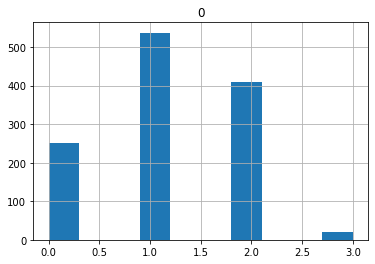

In [37]:
ah_pred_cb = cls.predict(ah_data)
print(pd.DataFrame(ah_pred_cb).hist())

### TensorFlow model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, LSTM, Dropout, Bidirectional
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
model = Sequential(
  [
    Input((4,7)),
    Bidirectional(LSTM(256, return_sequences=True, recurrent_activation='sigmoid')),
    LSTM(128, name="lstm-2"),
    Flatten(),
    Dense(4),
  ]
)

model.compile(optimizer='adam', loss = SparseCategoricalCrossentropy(from_logits=True), metrics=['acc', f1])
model.summary()

In [ ]:
x_train_tf = np.asarray(X).reshape(-1, 4, 7)
y_train_tf = np.asarray(y).reshape(-1, 1, 1)

In [ ]:
model.fit(
  x_train_tf,
  y_train_tf,
  batch_size=8192,
  validation_split=0.2,
  epochs=10
)

### Results

In [ ]:
X_test = np.asarray(X_test).reshape(-1, 4, 7)
result = model.predict(X_test, batch_size=4096)
result = result.argmax(axis=1).astype(np.float32)
f1_score(y_test, result)

In [ ]:
ah_data = np.asarray(ah_data).reshape(-1, 4, 7)
ah_result = model.predict(ah_data)
print(pd.DataFrame(ah_result)[0].hist())

# ah_result = ah_result.argmax(axis=1).astype(np.float32)
# print(pd.DataFrame(ah_result).hist())

In [ ]:
acc = (result == y_test).sum() / y_test.shape[0]
print("acc: {}".format(acc))

In [ ]:
# pd.DataFrame(y_test[result != y_test]).hist()
print(pd.DataFrame(result).hist())

In [ ]:
print(y.hist())

In [ ]:
result.max()

In [ ]:
from sklearn.metrics import confusion_matrix

# visualize the accuracy of predicted classes of potential amplitude
conf_mat = confusion_matrix(y_test, result)
print(conf_mat)